<a href="https://colab.research.google.com/github/dgg32/ml_pycaret/blob/main/pycaret_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.7MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 66.3MB 70kB/s 
     |████████████████████████████████| 6.8MB 50.2MB/s 
     |████████████████████████████████| 174kB 52.8MB/s 
     |████████████████████████████████| 266kB 55.9MB/s 
     |████████████████████████████████| 276kB 52.8MB/s 
     |████████████████████████████████| 13.9MB 352kB/s 
     |████████████████████████████████| 1.6MB 52.7MB/s 
     |████████████████████████████████| 148.9MB 81kB/s 
     |████████████████████████████████| 1.8MB 48.8MB/s 
     |████████████████████████████████| 2.1MB 47.4MB/s 
     |████████████████████████████████| 604kB 39.5MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 3.1MB 45.0MB/s 
     |████████████████████████████████| 163kB 49.4MB/s 
 

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# What is clustering

Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. It is an exploratory data mining activity, and a common technique for statistical data analysis used in many fields including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression and computer graphics. Some common real life use cases of clustering are:

    Customer segmentation based on purchase history or interests to design targetted marketing compaigns.
    Cluster documents into multiple categories based on tags, topics, and the content of the document.
    Analysis of outcome in social / life science experiments to find natural groupings and patterns in the data.


# Overview of Clustering Module in PyCaret

PyCaret's clustering module (pycaret.clustering) is a an unsupervised machine learning module which performs the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups.

PyCaret's clustering module provides several pre-processing features that can be configured when initializing the setup through the setup() function. It has over 8 algorithms and several plots to analyze the results. PyCaret's clustering module also implements a unique function called tune_model() that allows you to tune the hyperparameters of a clustering model to optimize a supervised learning objective such as AUC for classification or R2 for regression.

# Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called Mice Protein Expression. The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse. Click Here to read more about the dataset.

In [3]:
from pycaret.datasets import get_data
dataset = get_data("mice")

MouseID  DYRK1A_N   ITSN1_N    BDNF_N  ...  Genotype  Treatment  Behavior   class
0   309_1  0.503644  0.747193  0.430175  ...   Control  Memantine       C/S  c-CS-m
1   309_2  0.514617  0.689064  0.411770  ...   Control  Memantine       C/S  c-CS-m
2   309_3  0.509183  0.730247  0.418309  ...   Control  Memantine       C/S  c-CS-m
3   309_4  0.442107  0.617076  0.358626  ...   Control  Memantine       C/S  c-CS-m
4   309_5  0.434940  0.617430  0.358802  ...   Control  Memantine       C/S  c-CS-m

[5 rows x 82 columns]

In [4]:
dataset.shape

(1080, 82)

In order to demonstrate the predict_model() function on unseen data, a sample of 5% (54 records) has been withheld from the original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 54 samples were not available at the time when this experiment was performed.

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print (f"data for modeling: {data.shape}")
print (f"unseen data for prediction: {data_unseen.shape}")

data for modeling: (1026, 82)
unseen data for prediction: (54, 82)


# Setting up Environment in PyCaret



The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the numeric_features and categorical_features parameters in setup().


In [6]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize=True, ignore_features = ["MouseID"], session_id = 123)

Description                 Value
0                               session_id                   123
1                            Original Data            (1026, 82)
2                           Missing Values                  True
3                         Numeric Features                    77
4                     Categorical Features                     4
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (1026, 91)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  229b
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36                              Clustering                 False
37                    Clustering Iteration                  None
38                     Polynomial Features                 False
39                       Polynomial Degree                  None
40                    Trignometry Features                 False
41                    Polynomial Threshold                  None
42                          Group Features                 False
43                       Feature Selection                 False
44            Features Selection Threshold                  None
45                     Feature Interaction                 False
46                           Feature Ratio                 False
47                   Interaction Threshold                  None



Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

    session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

    Missing Values : When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is True as the data contains missing values which are automatically imputed using mean for numeric features and constant for categorical features. The method of imputation can be changed using the numeric_imputation and categorical_imputation parameters in setup().

    Original Data : Displays the original shape of dataset. In this experiment (1026, 82) means 1026 samples and 82 features.

    Transformed Data : Displays the shape of the transformed dataset. Notice that the shape of the original dataset (1026, 82) is transformed into (1026, 91). The number of features has increased due to encoding of categorical features in the dataset.

    Numeric Features : The number of features inferred as numeric. In this dataset, 77 out of 82 features are inferred as numeric.

    Categorical Features : The number of features inferred as categorical. In this dataset, 5 out of 82 features are inferred as categorical. Also notice that we have ignored one categorical feature MouseID using the ignore_feature parameter.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.


# Create a Model

Training a cluster model in PyCaret is simple and similar to how you would create a model in the supervised learning modules. A clustering model is created using the create_model() function which takes one mandatory parameter: the ID of a model you want to train. This function returns a trained model object and few unsupervised metrics. See an example below:

In [7]:
kmeans = create_model("kmeans")

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.1187           137.5261  ...           0             0

[1 rows x 6 columns]

In [8]:
print (kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)




We have created a kmeans model using create_model(). Notice the n_clusters parameter is set to 4 which is the default when you do not pass a value to the num_clusters parameter. In the below example we will create a kmodes model with 6 clusters.


In [9]:
kmodes = create_model("kmodes", num_clusters=6)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.0262            47.0119  ...           0             0

[1 rows x 6 columns]

Simply replacing kmeans with kmodes inside create_model() has created akmodes clustering model. There are 9 models available in the pycaret.clustering module. To see the complete list of models in the library please see docstring or use models function.

In [10]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

# Assign a Model



Now that we have created a model, we would like to assign the cluster labels to our dataset (1080 samples) to analyze the results. We will achieve this by using the assign_model() function. See an example below:


In [11]:
kmean_results = assign_model(kmeans)
kmean_results.head()

MouseID  DYRK1A_N   ITSN1_N  ...  Behavior   class    Cluster
0  3501_12  0.344930  0.626194  ...       S/C  t-SC-m  Cluster 3
1   3520_5  0.630001  0.839187  ...       C/S  c-CS-m  Cluster 0
2  3414_13  0.555122  0.726229  ...       C/S  t-CS-m  Cluster 2
3   3488_8  0.275849  0.430764  ...       S/C  c-SC-s  Cluster 1
4   3501_7  0.304788  0.617299  ...       S/C  t-SC-m  Cluster 3

[5 rows x 83 columns]

Notice that a new column called Cluster has been added to the original dataset. kmean_results also includes the MouseID feature that we dropped during the setup() but it was not used for the model and is only appended to the dataset when you use assign_model(). In the next section we will see how to analyze the results of clustering using plot_model().

# Plot a Model

The plot_model() function can be used to analyze different aspects of the clustering model. This function takes a trained model object and returns a plot. See examples below:

In [12]:
plot_model(kmeans)

The cluster labels are automatically colored and shown in a legend. When you hover over the data points you will see additional features which by default use the first column of dataset (in this case MouseID). You can change this by passing the feature parameter and you may also set label to True if you want labels to be printed on the plot.

## Elbow Plot

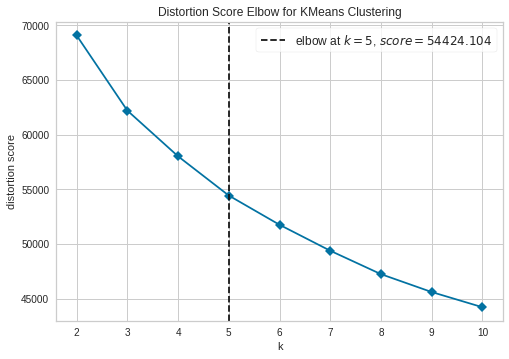

In [13]:
plot_model(kmeans, plot="elbow")

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. In this example the Elbow plot above suggests that 5 is the optimal number of clusters.

## Distribution Plot

In [16]:
plot_model(kmeans, plot="distribution")

The distribution plot shows the size of each cluster. When hovering over the bars you will see the number of samples assigned to each cluster. From the example above, we can observe that cluster 3 has the highest number of samples. We can also use the distribution plot to see the distribution of cluster labels in association with any other numeric or categorical feature. See an example below:

In [17]:
plot_model(kmeans, plot="distribution", feature="class")

In the above example we have used class as a feature so each bar represents a class which is colored with a cluster label (legend on right). We can observe that class t-SC-m and c-SC-m is mostly dominated by Cluster 3. We can also use the same plot to see the distribution of any continious feature. See an example below:

In [18]:
plot_model(kmeans, plot="distribution", feature="CaNA_N")

# Predict on unseen data

The predict_model() function is used to assign cluster labels to a new unseen dataset. We will now use our kmeans model to predict the data stored in data_unseen. This variable was created at the beginning of the tutorial and contains 54 samples from the original dataset that were never exposed to PyCaret.

In [19]:
unseen_predictions = predict_model(kmeans, data = data_unseen)
unseen_predictions.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...  Behavior   class    Cluster
0  0.447506  0.628176  0.367388  ...       C/S  c-CS-m  Cluster 2
1  0.704633  0.802537  0.350110  ...       C/S  c-CS-m  Cluster 2
2  0.505093  0.695549  0.376029  ...       C/S  c-CS-m  Cluster 0
3  0.429133  0.563175  0.258429  ...       C/S  c-CS-m  Cluster 1
4  0.373648  0.471165  0.257909  ...       C/S  c-CS-m  Cluster 1

[5 rows x 82 columns]

The Cluster column indicating the cluster label predicted from the trained kmeans model is added onto data_unseen.

# Saving the model



We have now finished the experiment by using our kmeans model to predict labels on unseen data.

This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.


In [20]:
save_model(kmeans, "Final Kmeans Model 11Nov2020")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['MouseID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_n...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('

# Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [21]:
saved_kmeans = load_model("Final Kmeans Model 11Nov2020")

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen that we have used in section 10 above.

In [22]:
new_prediction = predict_model(saved_kmeans, data = data_unseen)
new_prediction.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...  Behavior   class    Cluster
0  0.447506  0.628176  0.367388  ...       C/S  c-CS-m  Cluster 2
1  0.704633  0.802537  0.350110  ...       C/S  c-CS-m  Cluster 2
2  0.505093  0.695549  0.376029  ...       C/S  c-CS-m  Cluster 0
3  0.429133  0.563175  0.258429  ...       C/S  c-CS-m  Cluster 1
4  0.373648  0.471165  0.257909  ...       C/S  c-CS-m  Cluster 1

[5 rows x 82 columns]

Notice that the results of unseen_predictions and new_prediction are identical.